# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on different datasets.
The figures in this notebook were generated by see-classify with has `1729ec21b8e884e61da78fe03b714cc7dd443692`.

In [1]:
from figures_markdown_snippets import show_data_instructions

show_data_instructions()


To generate data, run:
- for sklearn
```bash
sbatch generate_sklearn_data.sb -n 100 -p 100 -t 100
```
- for dhahri
```bash
sbatch generate_dhahri_data.sb -n 100 -p 100 -t 100
```
These commands generate files for running genetic search using 100 generations 
and population size of 100 for 100 trials for the sklearn and the
Breast Cancer Wisconsin (Diagnostic) Dataset respectively.

The `-n`, `-p`, `-t` flags control number of generations, population sizes, 
and number of trials respectively.

The data generated tracks the top 10 individuals and the population by
each generation and is stored in the corresponding output 
(i.e. the slurm_\[id\].out file).

To extract this data to a csv file, run:
- for the top 10 individuals:
```bash
grep "# GEN HOF_index" slurm_[id].out | cut -d '|' -f2 > "filename_1.csv"
```
- for the population:
```bash
grep "# GEN population_index" slurm_[id].out | cut -d '|' -f2 > "filename_2.csv"
```
    
If the jobs are taking too long to finish, one can batch multiple jobs
and reduce the number of trials. To batch multiple jobs simultaneously
modify the array range on line two of the job scripts. For example,
to generate 100 trials only could submit 25 jobs, each of which would
run 4 jobs. To submit 25 jobs simultaneously, modify line two such that:

- before:
```bash
#SBATCH --array=0
```
- after:
```bash
#SBATCH --array=0-24
```

Then, to run each jobs with 4 trials, enter the following into
the command line:
```bash
sbatch generate_dhahri_data.sb -n 100 -p 100 -t 4
```

In this case, one would have multiple output files (`.out`) that contain different trials 
of the same GA run. One could try the moving all the relevant files into 
one directory (`mv`), changing to that directory (`cd`), and running the following commands instead:
- for the top 10 individuals:
```bash
grep "# GEN HOF_index" *.out | cut -d '|' -f2 > "filename_1.csv"
```
- for the population:
```bash
grep "# GEN population_index" *.out | cut -d '|' -f2 > "filename_2.csv"
```


In [2]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

Set output filenames to build figures

In [3]:
population_datasets = [
    "../0802_sklearn_data/circles_population_100_100.csv",
    "../0802_sklearn_data/linearly_separable_population_100_100.csv",
    "../0802_sklearn_data/moons_population_100_100.csv",
    "../0730_dhahri_simple_data/pop_size_100/dhahri_2019_population_100_100.csv"
]

hof_datasets = [
    "../0802_sklearn_data/circles_hof_100_100.csv",
    "../0802_sklearn_data/linearly_separable_hof_100_100.csv",
    "../0802_sklearn_data/moons_hof_100_100.csv",
    "../0730_dhahri_simple_data/pop_size_100/dhahri_2019_hof_100_100.csv"
]

In [4]:
# Describe these runs
ds_names = ["Circles", "Linearly Separable", "Moons", "WBCD"]
tutorial_best = [0.075, 0.05, 0.025, 1-0.98725]

num_gen = 100
num_trials = 100
pop_size = 100
hof_size = 10

CPU times: user 1min 42s, sys: 7.03 s, total: 1min 49s
Wall time: 1min 42s


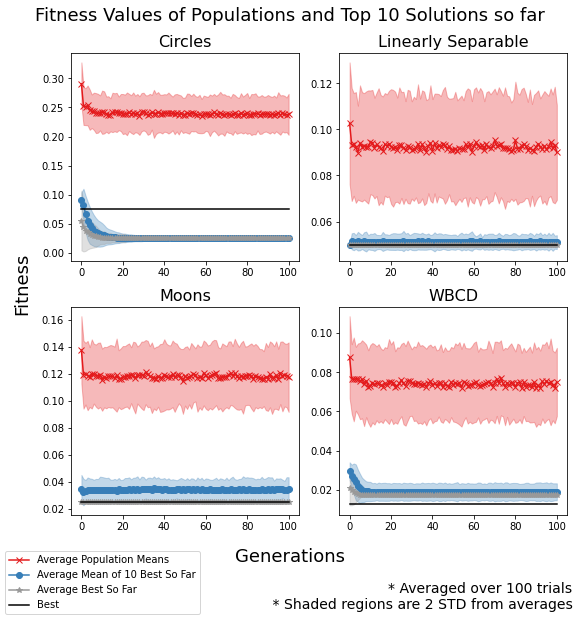

In [8]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from figures_helpers import plot_generation_fitness

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, ax in enumerate(axs.ravel()):
    plot_generation_fitness(
        population_datasets[i],
        hof_datasets[i],
        num_gen,
        pop_size,
        num_trials,
        hof_size,
        axs=ax,
    )
    
    # Format subplots
    ax.set_title(ds_names[i], fontdict={"fontsize": 16})
    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Plot tutorial best
    generation = list(range(0, num_gen + 1))
    best = np.repeat(tutorial_best[i], num_gen + 1)

    ax.plot(generation, best, "k-", label=f"Best")

    # Format legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower left')
        ax.get_legend().remove()
    else:
        ax.get_legend().remove()

fig.suptitle("Fitness Values of Populations and Top 10 Solutions so far", fontsize=18)
fig.supxlabel('Generations', fontsize=18)
fig.supylabel('Fitness', fontsize=18)

# Add caption
plt.figtext(
    0.99,
    -0.065,
    "* Averaged over 100 trials\n * Shaded regions are 2 STD from averages",
    horizontalalignment="right",
    fontdict={"fontsize": 14},
)

plt.tight_layout()